In [1]:
import numpy as np
import matplotlib.pyplot as plt
import preprocessing as pp
import implementations as imp

# Import Data Sets


In [2]:
path="/Users/leocusumano/myCloud/EPFL/MA1/ML/Proj1/DATASETS/f_sets/"

x_train=np.load(path+"f_x_train_.npy")
x_test=np.load(path+"f_x_test_.npy")
y_train=np.load(path+"f_y_train_.npy")
test_ids=np.load(path+"f_test_ids_.npy")
train_ids=np.load(path+"f_train_ids_.npy")

In [14]:

x,x_t,y=pp.Edited_clean_data(x_train,y_train,x_test,correlation_thr=.95,nan_thr=.5,std_thr=0.1)

y_=np.where(y==-1,0,1)

X,Y,X_T,Y_T=pp.split_data(x,y_,.5)

Max median NaN score rows :  0.5688708393430034
Max median NaN score columns :  0.7598051755967697
Number of rows dropped because of a NaN score > 0.5:  29455
Number of columns dropped because of a NaN score > 0.5:  149
Number of columns with std < 0.1: 5
Number of columns with correl_coef > 0.95: 19
Handling NaN values...
Number of columns with corr_coef> 0.95 after cleaning: 2
The data has been cleaned and standardized
The cleaned x-data has the following shape:  (298680, 146)
The cleaned y-data has the following shape:  (298680,)
The cleaned x-data-to-predict has the following shape:  (109379, 146)


# Logistic

In [4]:
param_grid = {
    "max_iters": [1500],
    "gamma": [0.001, 0.01, 0.1],
    "lambda_": [0.01, 0.1, 1],
}

In [5]:
best_params_log = None
best_score_log = float("inf")
w_initial = np.zeros(X.shape[1])
best_w_log = w_initial
logs=[]
for max_iters in param_grid["max_iters"]:
    for gamma in param_grid["gamma"]:
            w, loss,losses = imp.logistic_regression(Y, X, w_initial, max_iters, gamma,True)
            print("Loss:", loss)
            logs.append({"loss": loss, "max_iters": max_iters, "gamma": gamma,"losses":losses})
            if loss < best_score_log:
                best_score_log = loss
                best_w_log = w
                best_params_log = {
                    "max_iters": max_iters,
                    "gamma": gamma,
                }

losses_ar=np.array([a["losses"] for a in logs])               
                  
print("Best hyperparameters found: ", best_params_log)

Loss: 0.6490024372224288
Loss: 0.5852106138261779


/Users/leocusumano/myCloud/EPFL/MA1/ML/Proj1/ML-proj1/implementations.py:343: RuntimeWarning: divide by zero encountered in log
  return (-1/ N* np.sum(y * np.log(sigmoid(tx @ w)) + (1 - y) * np.log(1 - sigmoid(tx @ w)))
/Users/leocusumano/myCloud/EPFL/MA1/ML/Proj1/ML-proj1/implementations.py:343: RuntimeWarning: invalid value encountered in multiply
  return (-1/ N* np.sum(y * np.log(sigmoid(tx @ w)) + (1 - y) * np.log(1 - sigmoid(tx @ w)))


Loss: nan
Best hyperparameters found:  {'max_iters': 1500, 'gamma': 0.01}


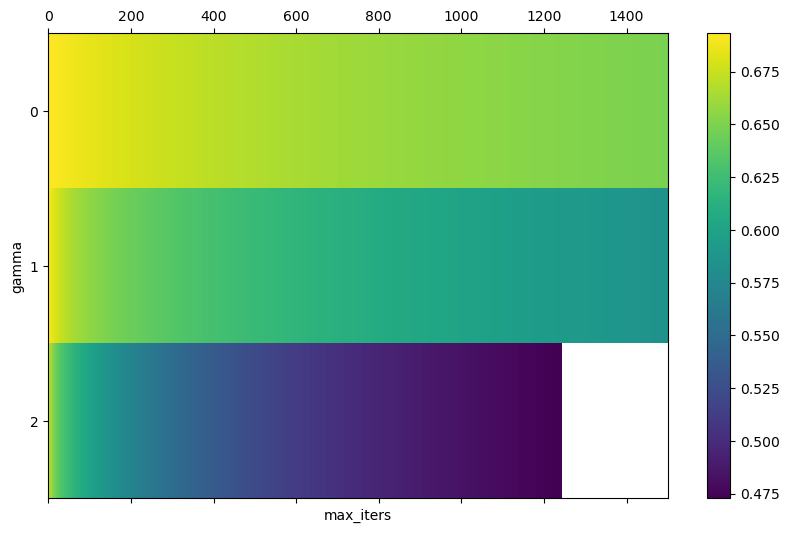

Best loss: 0.4726924412616539
Best iterations  1244
Best gamma  0.1


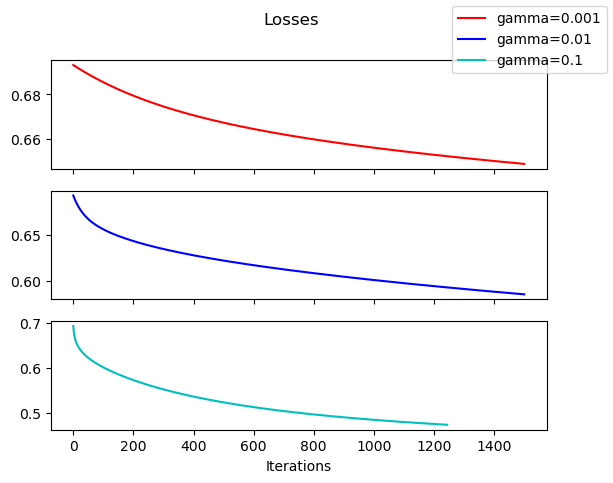

In [6]:
plt.figure(figsize=(10, 6))
plt.matshow(losses_ar, fignum=1, aspect='auto')
plt.ylabel("gamma")
plt.xlabel("max_iters")
plt.colorbar()
plt.show()

_,a=plt.subplots(3,1,sharex=True)
_.suptitle("Losses")
a[0].plot(logs[0]["losses"],"r-",label="gamma=0.001")

a[1].plot(logs[1]["losses"],"b-",label="gamma=0.01")
a[2].plot(logs[2]["losses"],"c-",label="gamma=0.1")
a[2].set_xlabel("Iterations")
_.legend()
minlo=np.min(losses_ar[losses_ar>0])
best_iter=np.where(losses_ar==minlo)
print("Best loss:",minlo)
print("Best iterations ",best_iter[1][0])
print("Best gamma ",param_grid["gamma"][best_iter[0][0]])

In [10]:

w_tot, loss_tot,losses = imp.logistic_regression(y, x, np.zeros(x.shape[1]), 1100,0.1,True)
loss_tot

0.4776820927027345

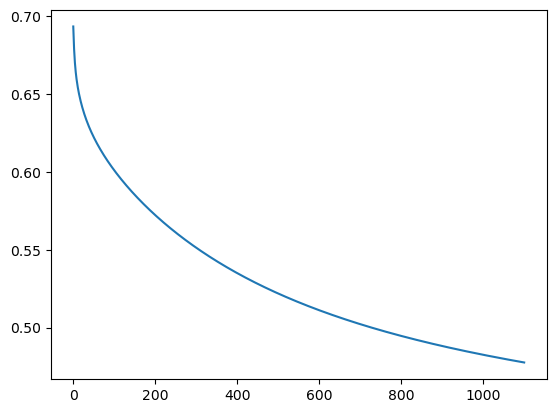

In [11]:
losses_n=np.array(losses)
plt.plot(losses_n)

In [15]:
from sklearn.metrics import f1_score,accuracy_score,roc_curve

# Compute the predicted probabilities
y_pred_proba = imp.sigmoid(x @ w_tot)

# Search for the best threshold
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []
for threshold in thresholds:
    y_pred_log = np.where(y_pred_proba > threshold, 1, -1)
    f1 = f1_score(y, y_pred_log)
    f1_scores.append(f1)

# Find the threshold with the highest F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal Threshold based on F1 score:", optimal_threshold, "F1 score:", np.max(f1_scores))
print("Accuracy:", accuracy_score(y, np.where(y_pred_proba > optimal_threshold, 1, -1)))



Optimal Threshold based on F1 score: 0.4 F1 score: 0.3494340863194477
Accuracy: 0.814483728404982


best
Optimal Threshold based on F1 score: 0.63 F1 score: 0.4071666487589986
Accuracy: 0.8654821948283481


In [10]:
import helpers as hlp


In [11]:
# y_sub = imp.sigmoid(x_t @ w_tot)
# y_sub = np.where(y_sub > optimal_threshold, 1, -1)

# hlp.create_csv_submission(test_ids, y_sub, "/Users/leocusumano/myCloud/EPFL/MA1/ML/Proj1/DATASETS/y_pred_logg.csv")

